In [1]:
import pandas as pd

df = pd.read_csv("../datasets/diamonds/diamonds.csv")
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82
5,0.32,Ideal,G,IF,61.7,54.0,918,4.39,4.42,2.72
6,0.30,Very Good,H,IF,62.9,58.0,789,4.26,4.29,2.69
7,0.61,Ideal,E,VVS2,61.3,54.0,2823,5.51,5.59,3.40
8,2.01,Premium,G,SI2,61.2,57.2,18705,8.08,8.14,4.97
9,0.31,Ideal,I,VS1,61.2,55.0,507,4.37,4.39,2.68


## Missing values and outliers

In [2]:
# show data containing null values
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


The price column has a minimum value of -1 which means that some diamonds in the dataset have a negative price.

In [4]:
negative_prices = df[df['price'] < 0]
negative_prices

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


Since those values do not make sense we do not want to use them to train or test any model, so we can safely drop the corresponding rows.

In [5]:
df = df.drop(negative_prices.index)
df.describe()

,carat,depth,table,price,x,y,z
count,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,0.794409,61.711062,57.446553,3933.408216,5.725084,5.727673,3.532970
std,0.468388,1.445500,2.259633,3975.541768,1.119085,1.112017,0.690183
min,0.230000,44.000000,51.600000,351.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.525000
75%,1.040000,62.500000,59.000000,5377.500000,6.540000,6.537500,4.030000
max,4.130000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


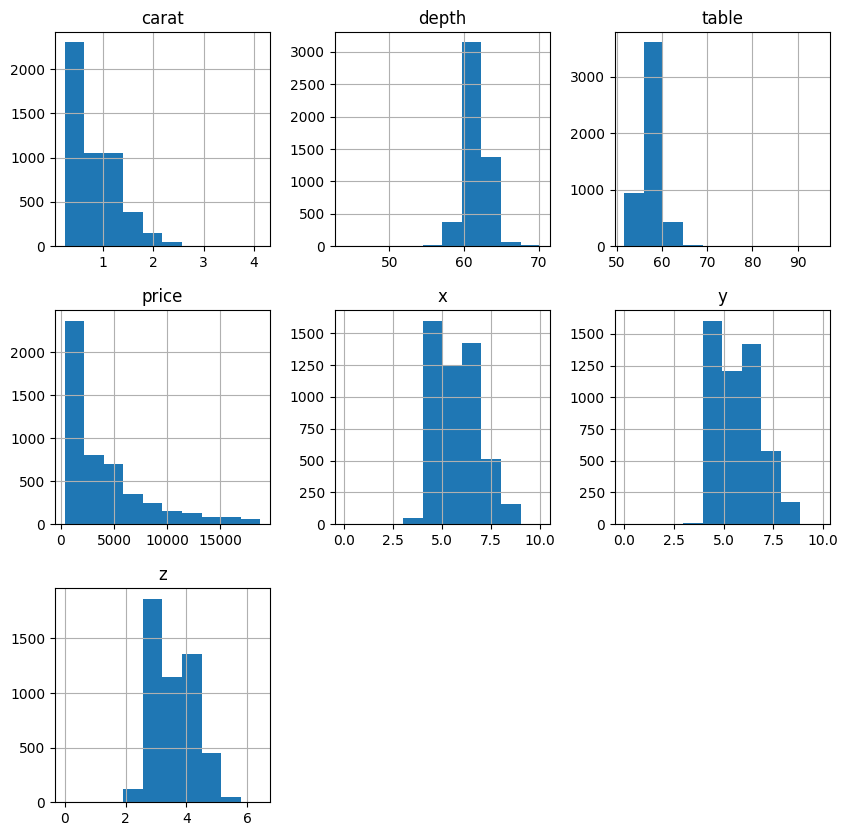

In [6]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10))
plt.show()

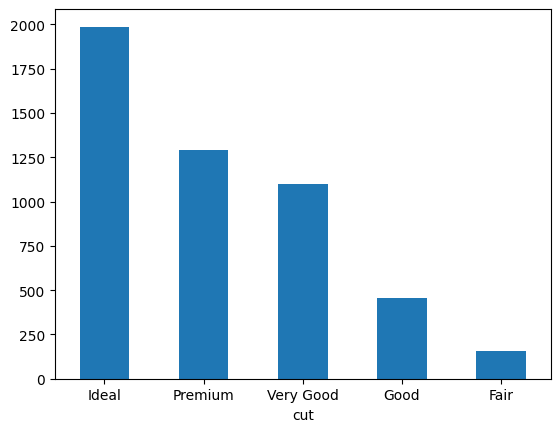

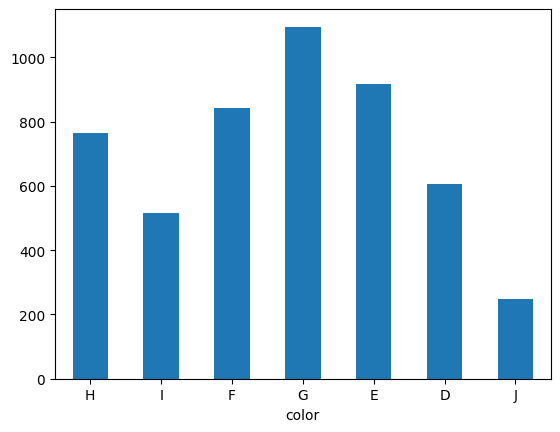

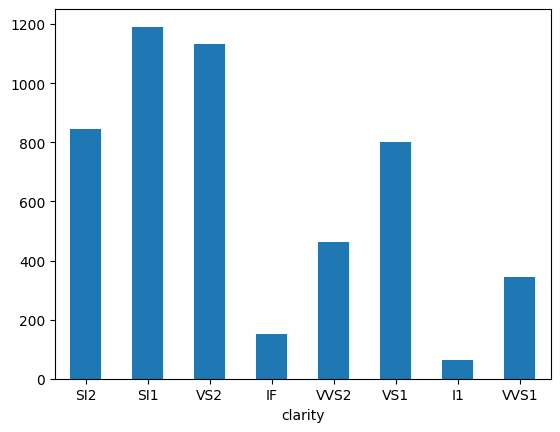

In [7]:
df['cut'].value_counts(sort=False).plot.bar(rot=0)
plt.show()
df['color'].value_counts(sort=False).plot.bar(rot=0)
plt.show()
df['clarity'].value_counts(sort=False).plot.bar(rot=0)
plt.show()

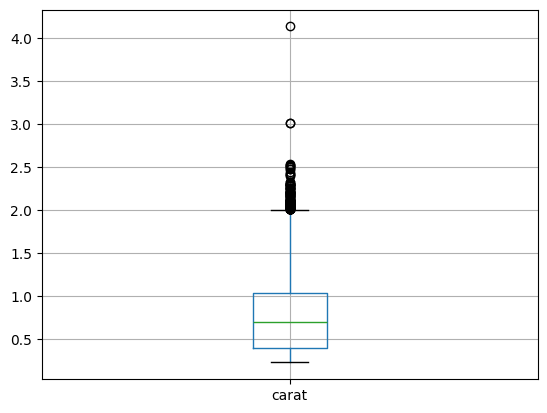

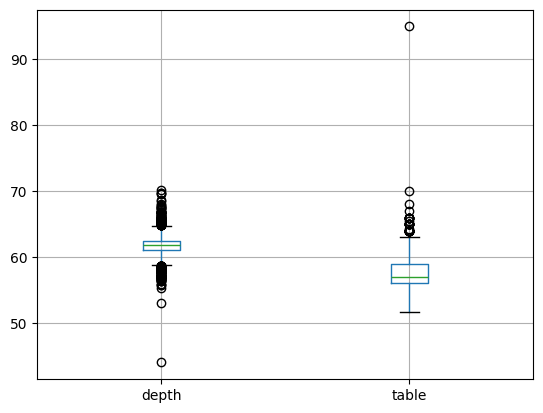

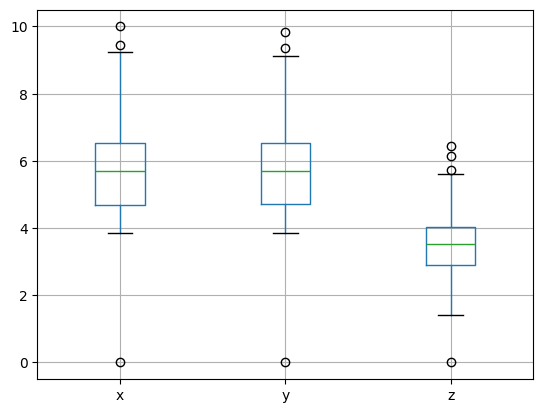

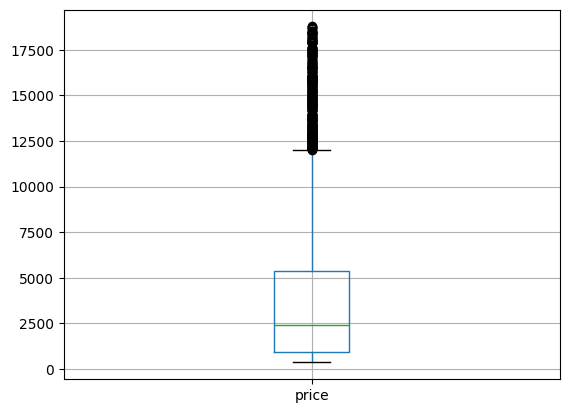

In [8]:
df.boxplot(['carat'])
plt.show()
df.boxplot(['depth', 'table'])
plt.show()
df.boxplot(['x', 'y' ,'z'])
plt.show()
df.boxplot(['price'])
plt.show()

## Categorical features

In [9]:
cut_unique_values = df['cut'].unique()
color_unique_values = df['color'].unique()
clarity_unique_values = df['clarity'].unique()

print("Unique values of 'cut' column: \t\t", cut_unique_values)
print("Unique values of 'color' column: \t", color_unique_values)
print("Unique values of 'clarity' column: \t", clarity_unique_values)

Unique values of 'cut' column: 		 ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Unique values of 'color' column: 	 ['H' 'I' 'F' 'G' 'E' 'D' 'J']
Unique values of 'clarity' column: 	 ['SI2' 'SI1' 'VS2' 'IF' 'VVS2' 'VS1' 'I1' 'VVS1']


We know from the description of the dataset that the color grading scale has all letters from D to Z as possible values, but unique values of the 'color' column are only a subset of them.
Since new unseen data may also contain the others, we want to correctly encode all of them.

Moreover, when encoding the categorical features we also want to preserve their natural order, which can be a valuable information for a Machine Learning model. Since we know that in advance for all of them from the description of the dataset, we can hardcode the order before mapping them to numeric values.

In [10]:
color_grading_scale = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
cut_grade_scale = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
clarity_scale = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

Create mapping dictionaries to perform ordinal encoding of the categorical features.

In [11]:
color_grade_encoder = {grade: index for index, grade in enumerate(color_grading_scale)}
cut_grade_encoder = {grade: index for index, grade in enumerate(cut_grade_scale)}
clarity_encoder = {clarity: index for index, clarity in enumerate(clarity_scale)}

In [12]:
df_encoded = pd.DataFrame(df)

df_encoded['color'] = df['color'].map(color_grade_encoder)
df_encoded['cut'] = df['cut'].map(cut_grade_encoder)
df_encoded['clarity'] = df['clarity'].map(clarity_encoder)

df_encoded.head(10)
df_encoded

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,0,4,6,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,0,4,5,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,1,5,5,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,0,2,5,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,2,2,4,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,0,4,2,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,1,3,2,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,0,6,2,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,1,2,4,62.9,58.0,802,4.31,4.27,2.70


In [13]:
df_encoded.to_csv('../datasets/diamonds/diamonds_encoded.csv', index=False)